En esta actividad, vamos a poner en práctica todo lo que aprendimos sobre procesamiento de imágenes para crear un proyecto.

Objetivo: El objetivo de este proyecto es que utilicen procedimientos básicos de procesamiento de imágenes para leer una imagen, aplicarle mejoras, segmentar objetos y mostrar los resultados en una presentación visual.

Duración: Tenemos 1 hora para completar este desafío.

##Preparación:

Entorno: Vamos a usar Google Colab, que ya tiene todo lo que necesitamos instalado.

##Imágenes:

Les voy a proporcionar un conjunto de imágenes de ejemplo para que elijan la que más les guste. Hay de todo un poco: paisajes, objetos, retratos... ¡para que tengan variedad!

Si prefieren, ¡pueden usar sus propias fotos! Solo recuerden elegir una imagen con buena iluminación y calidad para que los resultados sean los mejores.

Google Colab: Este cuaderno ya está listo para que trabajen. Solo tienen que seguir las instrucciones y completar el código en los espacios indicados.

Pasos a seguir:

##1. ¡Empecemos importando las bibliotecas!
Lo primero que vamos a hacer es importar las herramientas que vamos a utilizar.

In [113]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 2. Leyendo y viendo nuestra imagen
Subir la imagen: Si van a usar una foto propia, súbanla a Google Colab. Para hacerlo, hagan clic en el ícono de la carpeta en la barra lateral izquierda, luego en el ícono de "Subir" y seleccionen su archivo.

Leer la imagen: Con cv2.imread(), vamos a leer la imagen que eligieron. Recuerden que OpenCV lee las imágenes en formato BGR, así que la vamos a convertir a RGB para poder verla bien con Matplotlib.

Mostrar la imagen original: Usaremos matplotlib.pyplot para ver la imagen tal como es al principio.

In [114]:
# Descarga y lectura de imagen
!wget -O manzana.jpg "https://live.staticflickr.com/4/3929/15375865988_83abc517e7_z.jpg" -q

In [115]:
# # Convierte BGR a RGB
imagen_bgr = cv2.imread('manzana.jpg')
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)

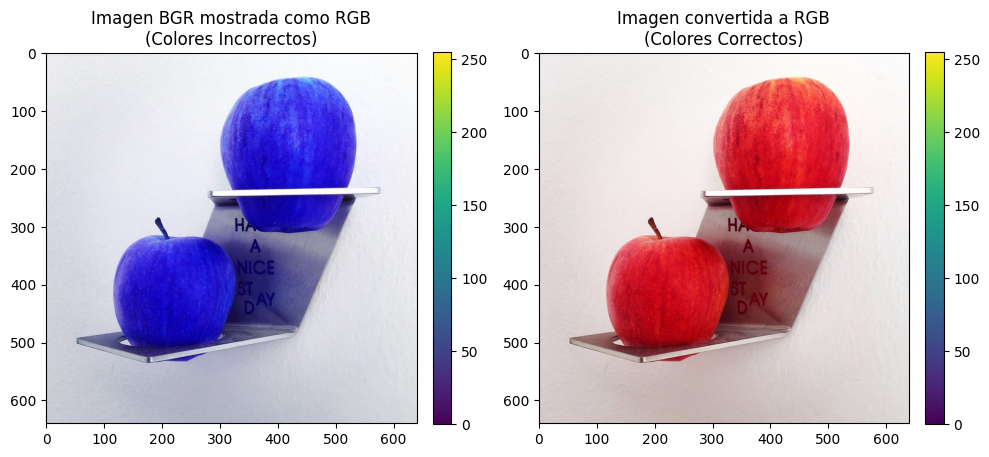

In [116]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Mostrar imagen BGR (mal interpretada por matplotlib)
im1 = ax1.imshow(imagen_bgr)
ax1.set_title('Imagen BGR mostrada como RGB\n(Colores Incorrectos)')
plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

# Mostrar imagen convertida a RGB (correctamente)
im2 = ax2.imshow(imagen_rgb)
ax2.set_title('Imagen convertida a RGB\n(Colores Correctos)')
plt.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)

plt.tight_layout() # Acomoda los elementos para que no superpongan
plt.show()

##3. ¡Mejorando nuestra imagen!
Ahora vamos a aplicar un par de técnicas para que nuestra imagen se vea aún mejor:

Ajuste de brillo y contraste: Vamos a crear una función para modificar estos aspectos de la imagen.

Ecualización de histograma: Con cv2.equalizeHist(), vamos a mejorar el contraste de la imagen.

In [117]:
def imhist3(X):
    (N, M, P) = X.shape  # Obtener dimensiones de la imagen
    n = 256  # Número de niveles de colores
    for p in range(3):  # Para cada canal de color
        h = np.zeros((256,))  # Crear un histograma vacío
        for i in range(N):  # Recorrer cada fila
            for j in range(M):  # Recorrer cada columna
                x = X[i, j, p]  # Obtener el valor del píxel
                h[x] += 1  # Incrementar el conteo en el histograma
        plt.figure(figsize=(30, 9))  # Tamaño de la figura
        plt.bar(range(n), h[0:n])  # Mostrar el histograma
        plt.title('Histograma del Canal ' + str(p))  # Título
        plt.show()  # Mostrar figura

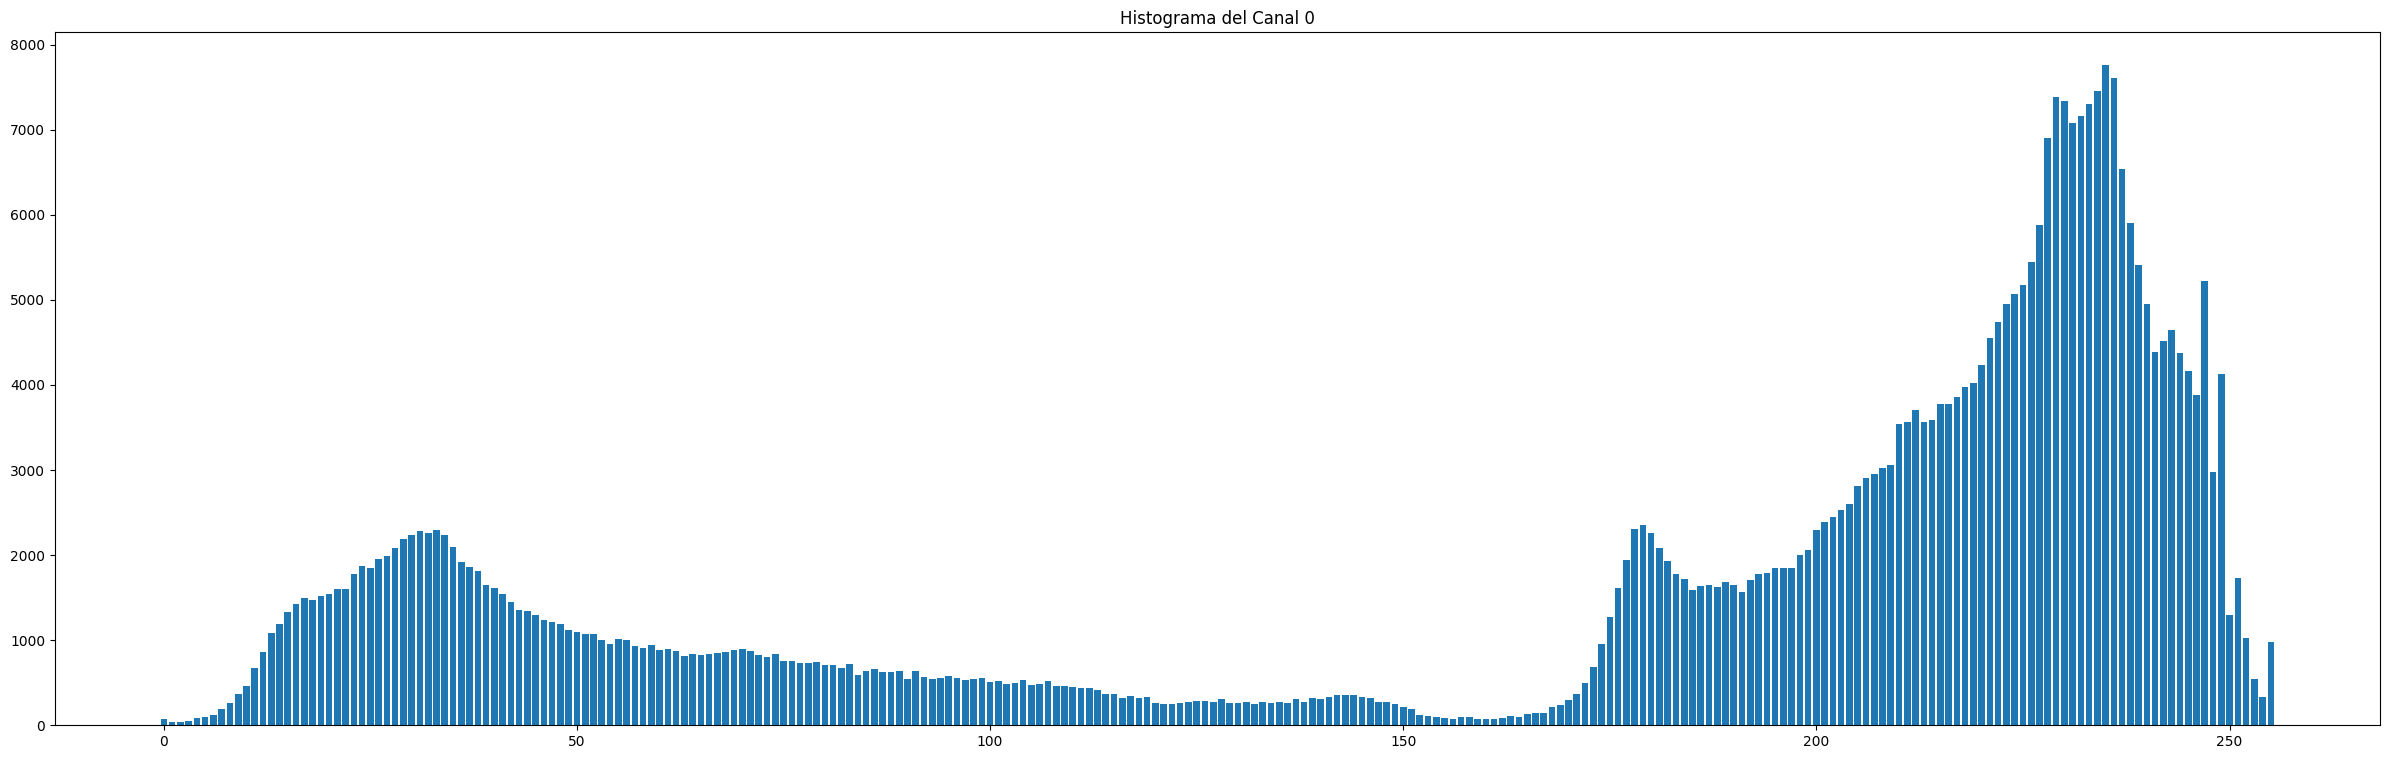

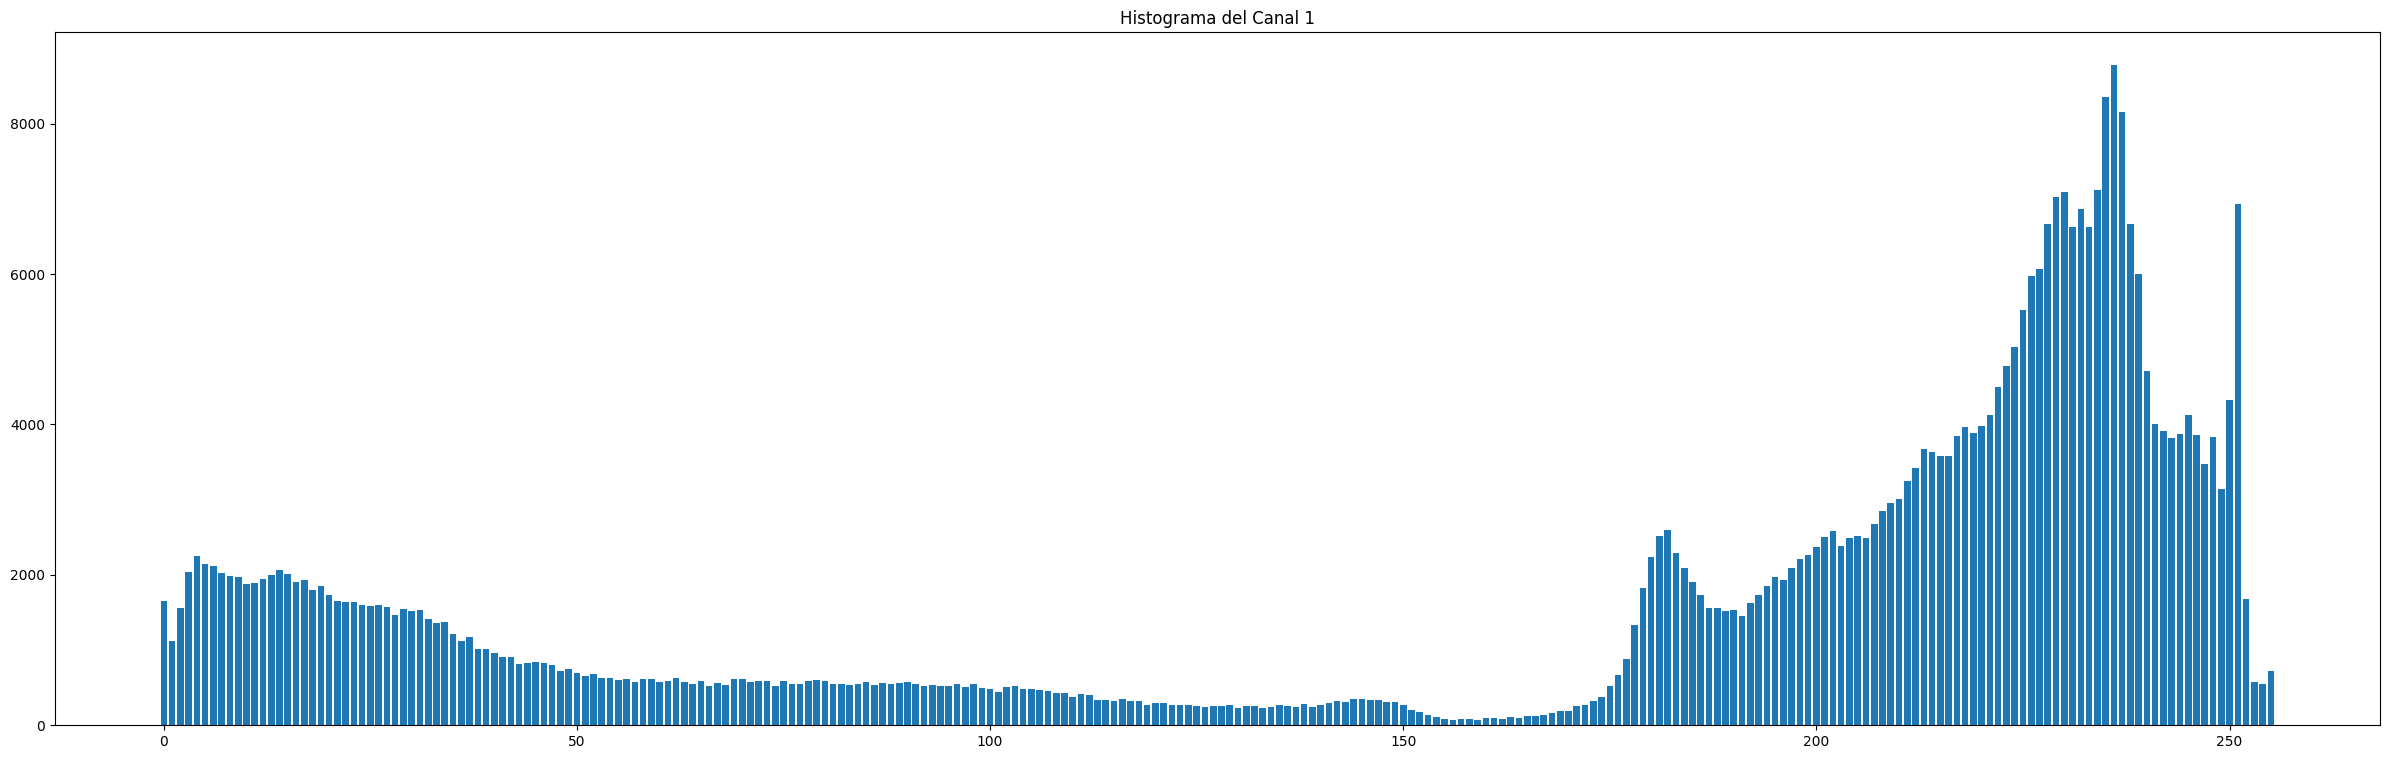

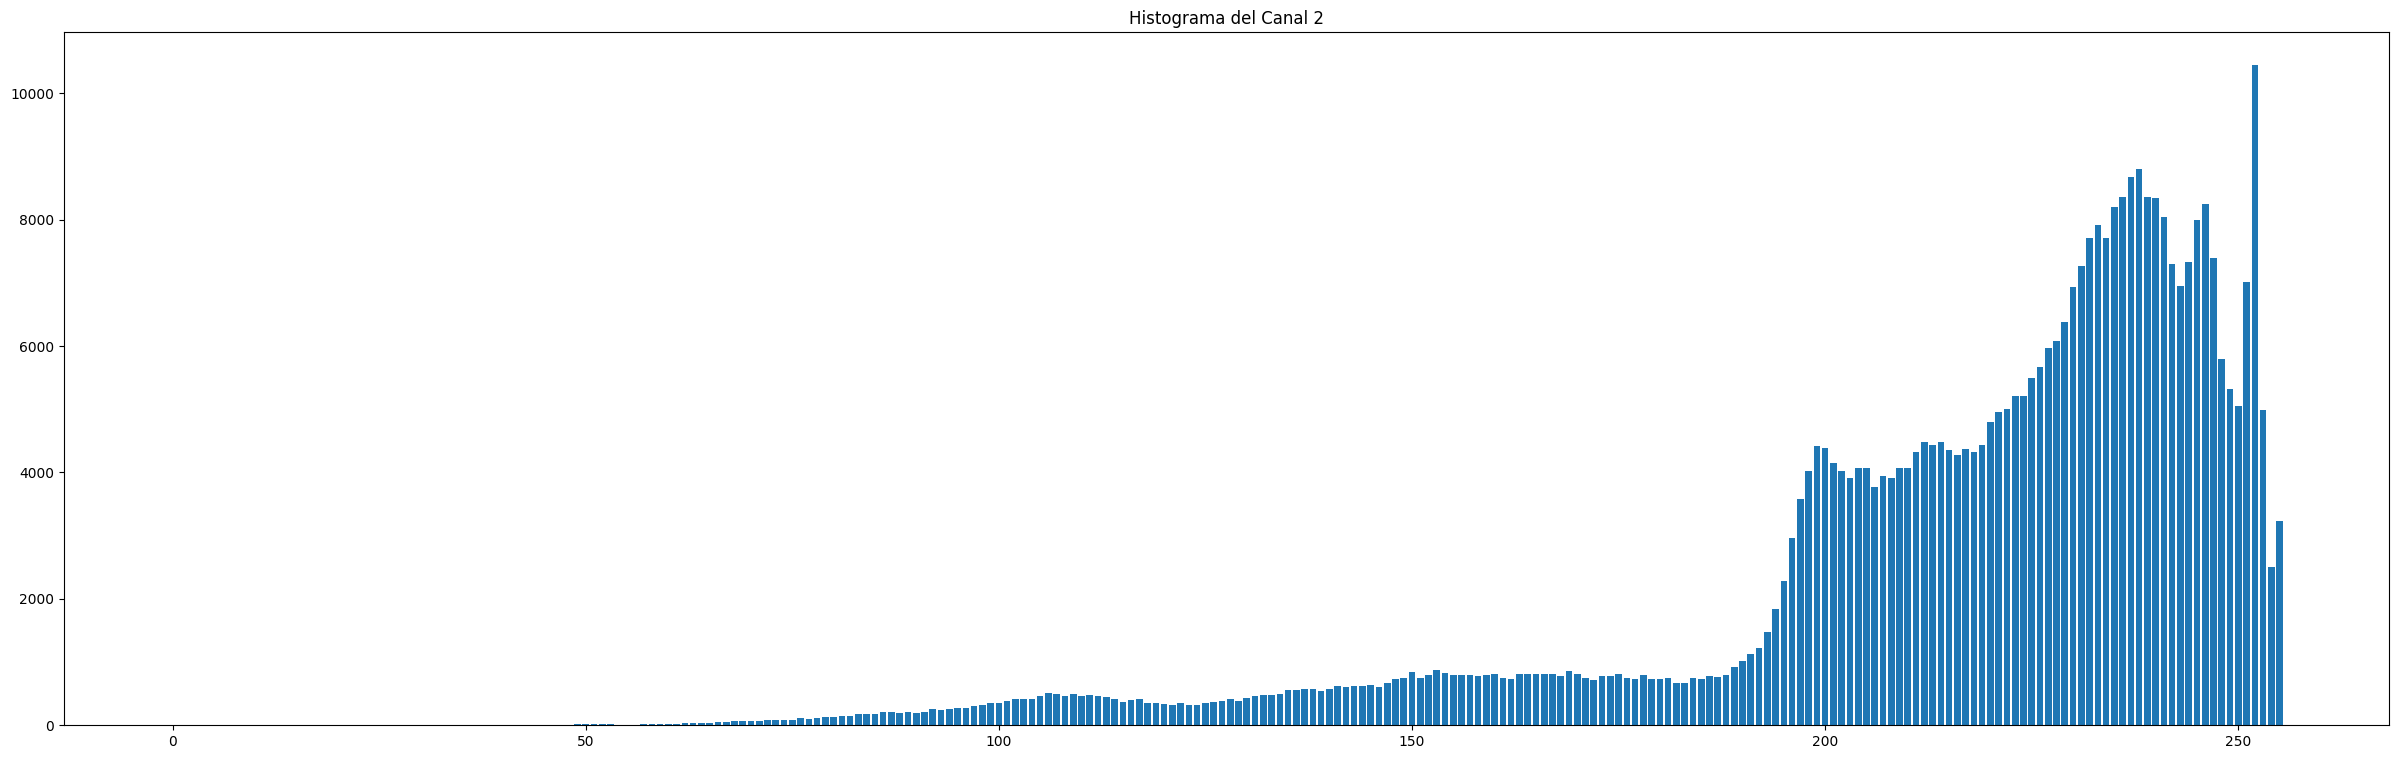

In [118]:
imhist3(imagen_bgr)  # Calcular y mostrar el histograma

In [119]:
K = imagen_bgr.copy()  # Hacer una copia de la imagen original
Khsv = cv2.cvtColor(K, cv2.COLOR_BGR2HSV)  # Convertir a HSV
Khsv[:, :, 2] = cv2.equalizeHist(Khsv[:, :, 2])  # Ecualizar el canal de brillo (V)
Knew = cv2.cvtColor(Khsv, cv2.COLOR_HSV2BGR)  # Convertir de nuevo a BGR

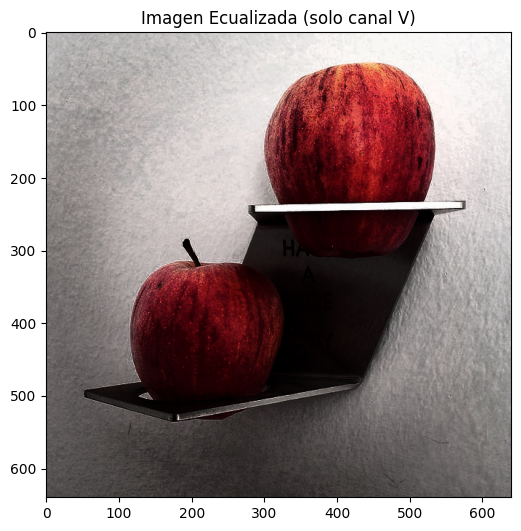

In [120]:
plt.figure(figsize=(6, 9))  # Tamaño de la figura
plt.imshow(cv2.cvtColor(Knew, cv2.COLOR_BGR2RGB))  # Mostrar la imagen ecualizada
plt.title('Imagen Ecualizada (solo canal V)')  # Título
plt.show()  # Mostrar figura

##4. ¡A segmentar por color!
Ahora viene una parte muy interesante: vamos a separar objetos de la imagen por su color.

Convertir a HSV: Vamos a pasar la imagen de RGB a HSV (Hue, Saturation, Value) porque es más fácil definir rangos de color en HSV.

Definir el rango de color: Vamos a establecer los límites inferior y superior del color que queremos segmentar. En el ejemplo, segmentamos el color rojo de las flores. ¡Presten mucha atención acá! Van a tener que ajustar estos valores para su propia imagen.

Crear una máscara: Con cv2.inRange(), vamos a crear una máscara que nos indique qué píxeles están dentro del rango de color y cuáles no.

Aplicar la máscara: Usaremos cv2.bitwise_and() para quedarnos solo con la parte de la imagen que corresponde al color que elegimos.

In [121]:
# Convertir a HSV
imagen_hsv = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2HSV)

In [122]:
# Segmentación básica por color utilizando HSV
# Definir el rango de color a segmentar (ejemplo: rojo)
limite_inferior_rojo = np.array([165, 100, 70])
limite_superior_rojo = np.array([180, 255, 255])

In [123]:
# Crear una máscara para el color rojo
mascara_roja = cv2.inRange(imagen_hsv, limite_inferior_rojo, limite_superior_rojo)

In [124]:
# Aplicar la máscara a la imagen original
resultado_rojo = cv2.bitwise_and(imagen_rgb, imagen_rgb, mask=mascara_roja)

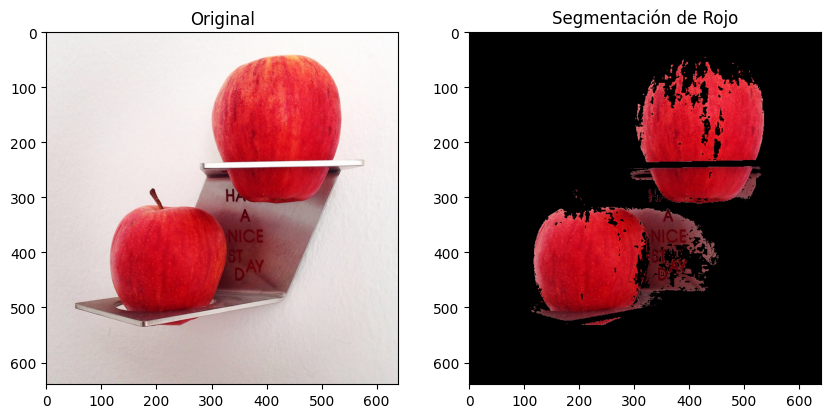

In [125]:
# Mostrar el resultado
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen_rgb)
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(resultado_rojo)
plt.title('Segmentación de Rojo')
plt.show()

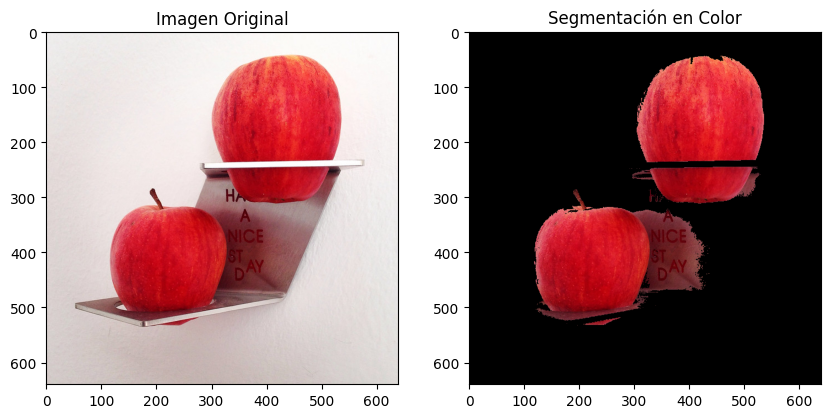

In [126]:
# Definir rangos de rojo
rojo_bajo = np.array([0, 120, 70])
rojo_alto = np.array([10, 255, 255])
rojo_bajo2 = np.array([170, 120, 70])
rojo_alto2 = np.array([180, 255, 255])

# Crear máscara para ambos rangos
mascara1 = cv2.inRange(imagen_hsv, rojo_bajo, rojo_alto)
mascara2 = cv2.inRange(imagen_hsv, rojo_bajo2, rojo_alto2)

# Combinar máscaras
mascara_roja = cv2.bitwise_or(mascara1, mascara2)

# Aplicar la máscara a la imagen original para obtener la segmentación en color
imagen_segmentada = cv2.bitwise_and(imagen_rgb, imagen_rgb, mask=mascara_roja)

# Mostrar la imagen original y la segmentación en color juntas
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen_rgb)
plt.title('Imagen Original')

plt.subplot(1, 2, 2)
plt.imshow(imagen_segmentada)  # Mostrar la segmentación en color
plt.title('Segmentación en Color')

plt.show()

##5. ¡Dibujando y escribiendo sobre la imagen!
Para terminar, vamos a agregarle un poco de información a nuestra imagen segmentada.

Dibujar rectángulos: Con cv2.findContours() vamos a encontrar los contornos de los objetos que segmentamos, y con cv2.boundingRect() vamos a obtener las coordenadas para dibujar un rectángulo alrededor de ellos. Usaremos cv2.rectangle() para dibujar el rectángulo.

Agregar texto: Con cv2.putText(), vamos a agregar un texto que describa los objetos que segmentamos.

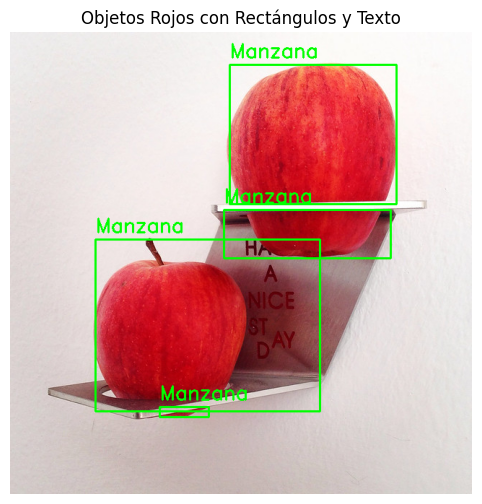

In [127]:
# Encontrar contornos en la máscara
contornos, _ = cv2.findContours(mascara_roja, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Copiar imagen original para dibujar
imagen_rect = imagen_rgb.copy()

# Dibujar rectángulos y agregar texto
for i, contorno in enumerate(contornos):
    if cv2.contourArea(contorno) > 100:  # Filtrar contornos pequeños
        x, y, w, h = cv2.boundingRect(contorno)
        cv2.rectangle(imagen_rect, (x, y), (x + w, y + h), (0, 255, 0), 2) # Rectángulo verde
        cv2.putText(imagen_rect, f"Manzana", (x, y -10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2) # Texto verde

# Mostrar imagen final
plt.figure(figsize=(8, 6))
plt.imshow(imagen_rect)
plt.title('Objetos Rojos con Rectángulos y Texto')
plt.axis('off')
plt.show()

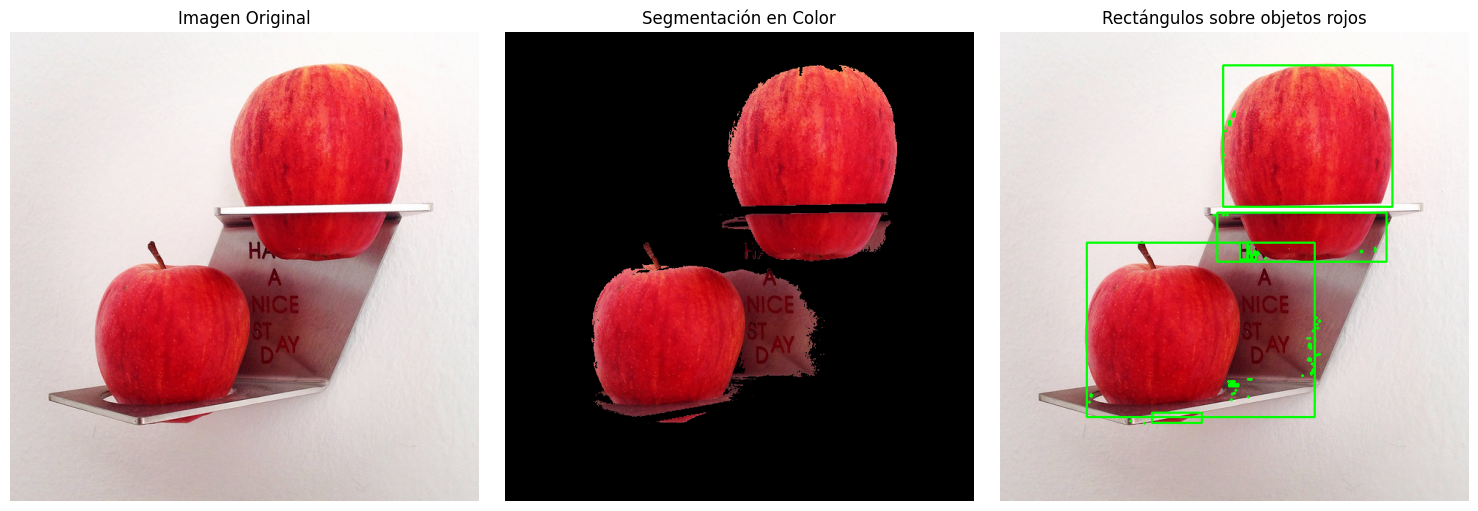

In [128]:
# Encontrar contornos
contornos, _ = cv2.findContours(mascara_roja, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Copiar imagen original para dibujar rectángulos
imagen_rect = imagen_rgb.copy()

# Dibujar rectángulo en cada contorno encontrado
for contorno in contornos:
    x, y, w, h = cv2.boundingRect(contorno)
    cv2.rectangle(imagen_rect, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Mostrar resultados
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(imagen_rgb)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.bitwise_and(imagen_rgb, imagen_rgb, mask=mascara_roja))
plt.title('Segmentación en Color')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(imagen_rect)
plt.title('Rectángulos sobre objetos rojos')
plt.axis('off')

plt.tight_layout()
plt.show()

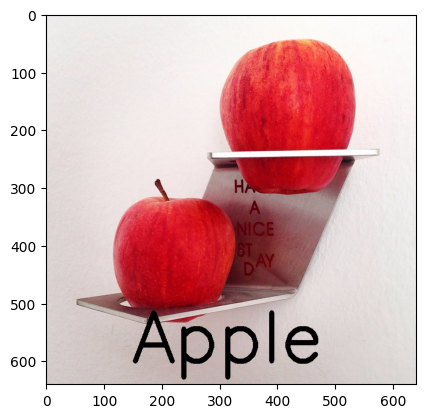

In [129]:
cv2.putText(imagen_rgb, "Apple",
            (150, 600),  # ← Bajamos la posición en Y (de 120 a 160)
            cv2.FONT_HERSHEY_SIMPLEX,
            4.0,          # Escala grande
            (0, 0, 0),  # Color blanco
            8)

plt.imshow(imagen_rgb)
plt.axis('on')
plt.show()

##6. Presentaciones preliminares

Cada uno/una de ustedes va a tener 5 minutos para mostrarnos su trabajo, que debe incluir:

La imagen original.

La imagen mejorada (ya sea con ajuste de brillo/contraste o ecualización de histograma).

La imagen segmentada.

Una explicación de todo el proceso, incluyendo:

La imagen que eligieron y por qué.

Los valores que usaron para ajustar el brillo y el contraste (si lo hicieron).

El rango de color HSV que eligieron para segmentar y por qué.

Cualquier dificultad que hayan tenido y cómo la resolvieron.

## Recursos

### Datasets Generales:

**[COCO](https://cocodataset.org/) (Common Objects in Context):** Este dataset es muy completo, con imágenes de objetos cotidianos en escenas complejas. Es ideal para practicar segmentación y reconocimiento de objetos.

**Ideas para el proyecto:** Segmentar diferentes objetos en una escena (personas, autos, animales) y analizar sus relaciones espaciales.


**[Open Images](https://storage.googleapis.com/openimages/web/index.html):** Un dataset masivo con millones de imágenes y anotaciones de objetos. Ofrece una gran variedad de temas y es excelente para proyectos más ambiciosos.

**Ideas para el proyecto:** Detectar y segmentar múltiples objetos en una imagen, o incluso intentar segmentar objetos dentro de un contexto específico (por ejemplo, segmentar diferentes tipos de árboles en un paisaje).


**[ImageNet](https://www.image-net.org/):** Este dataset contiene una gran cantidad de imágenes organizadas según la jerarquía de WordNet.

**Ideas para el Proyecto:** Los estudiantes pueden usar un subconjunto de ImageNet para segmentar y clasificar diferentes categorías de imágenes, como animales, vehículos o plantas.


### Datasets Específicos:

**[Flores](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html):** Datasets como Oxford Flowers 102 son perfectos para proyectos de segmentación por color, donde los estudiantes pueden aislar flores de diferentes tipos y colores.

**Ideas para el proyecto:** Segmentar flores de un color específico y luego usar técnicas de procesamiento de imágenes para analizar su forma o textura.


**[Rostros](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html):** Datasets como CelebA pueden usarse para proyectos de segmentación de características faciales o reconocimiento de rostros.

**Ideas para el proyecto:** Segmentar diferentes partes del rostro (ojos, nariz, boca) y analizar cómo cambian con las expresiones faciales.


**[Paisajes Urbanos](https://www.cityscapes-dataset.com/):** Cityscapes es ideal para segmentar elementos en entornos urbanos, como autos, peatones y edificios.

### Dónde Encontrar Más Datasets:

**[Kaggle](https://www.kaggle.com/datasets?search=image):** Esta plataforma ofrece una gran variedad de datasets de imágenes subidos por la comunidad, que pueden ser útiles para proyectos específicos.


**[Papers With Code](https://paperswithcode.com/datasets?mod=images):** Este sitio web recopila datasets utilizados en investigaciones de aprendizaje automático, incluyendo muchos datasets de imágenes.
Usa el código con precaución